#EDA

Throughout this notebook we will conduct Exploratory Data Analysis to get a better understanding of any insights we may be able to gather initially. This will help us make decisions on feature and model selection.


### Loading in Data

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Analytics Project/Data/Complete Data/FINAL_RAW_DF.csv'

df = pd.read_csv(file_path)

In [3]:
df

,track_id,track_name,artist_name,popularity,album,uri,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,release_date
0,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),"['The Weeknd', 'Playboi Carti']",92,Timeless,spotify:track:1Es7AUAhQvapIcoh3qMKDL,0.769,0.722,11,-5.485,...,0.1110,0.5700,119.973,audio_features,1Es7AUAhQvapIcoh3qMKDL,https://api.spotify.com/v1/tracks/1Es7AUAhQvap...,https://api.spotify.com/v1/audio-analysis/1Es7...,256000,4,2024-09-27
1,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","['The Weeknd', 'JENNIE', 'Lily-Rose Depp']",90,The Idol Episode 4 (Music from the HBO Origina...,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW,0.264,0.640,8,-6.221,...,0.1510,0.1900,84.828,audio_features,7CyPwkp0oE8Ro9Dd5CUDjW,https://api.spotify.com/v1/tracks/7CyPwkp0oE8R...,https://api.spotify.com/v1/audio-analysis/7CyP...,244685,4,2023-06-23
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],88,After Hours,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.513,0.730,1,-5.940,...,0.0897,0.3340,171.001,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,2020-03-20
3,7MXVkk9YMctZqd1Srtv4MB,Starboy,"['The Weeknd', 'Daft Punk']",87,Starboy,spotify:track:7MXVkk9YMctZqd1Srtv4MB,0.679,0.587,7,-7.015,...,0.1370,0.4860,186.003,audio_features,7MXVkk9YMctZqd1Srtv4MB,https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...,https://api.spotify.com/v1/audio-analysis/7MXV...,230453,4,2016-11-25
4,2LBqCSwhJGcFQeTHMVGwy3,Die For You,['The Weeknd'],84,Starboy,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,0.586,0.525,1,-7.163,...,0.1340,0.5080,133.629,audio_features,2LBqCSwhJGcFQeTHMVGwy3,https://api.spotify.com/v1/tracks/2LBqCSwhJGcF...,https://api.spotify.com/v1/audio-analysis/2LBq...,260253,4,2016-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22076,0ZvBsy5vNFNVvvzkQ07aID,Raindrops,"['Helion', 'Violet Days']",25,Raindrops,spotify:track:0ZvBsy5vNFNVvvzkQ07aID,0.723,0.607,7,-7.628,...,0.3650,0.3590,124.968,audio_features,0ZvBsy5vNFNVvvzkQ07aID,https://api.spotify.com/v1/tracks/0ZvBsy5vNFNV...,https://api.spotify.com/v1/audio-analysis/0ZvB...,151832,4,2021-01-22
22077,3gfZUCWy8ZHKynKh5w3Hxo,Addicted - Midnight Kids Remix,"['Shaun Frank', 'Violet Days', 'Midnight Kids']",22,Addicted (The Remixes),spotify:track:3gfZUCWy8ZHKynKh5w3Hxo,0.303,0.665,7,-4.876,...,0.1870,0.0796,113.968,audio_features,3gfZUCWy8ZHKynKh5w3Hxo,https://api.spotify.com/v1/tracks/3gfZUCWy8ZHK...,https://api.spotify.com/v1/audio-analysis/3gfZ...,205125,4,2018-04-06
22078,1YFwQreHWmir03jdSVw08N,So Dope,['Violet Days'],20,So Dope,spotify:track:1YFwQreHWmir03jdSVw08N,0.510,0.377,1,-11.849,...,0.3640,0.2460,97.908,audio_features,1YFwQreHWmir03jdSVw08N,https://api.spotify.com/v1/tracks/1YFwQreHWmir...,https://api.spotify.com/v1/audio-analysis/1YFw...,228553,4,2015-06-03
22079,0TRpka5LZRqIJSGccmPQSX,Save Me (feat. Violet Days),"['GATTÜSO', 'Violet Days']",19,Save Me (feat. Violet Days),spotify:track:0TRpka5LZRqIJSGccmPQSX,0.692,0.762,5,-4.510,...,0.1010,0.5090,123.906,audio_features,0TRpka5LZRqIJSGccmPQSX,https://api.spotify.com/v1/tracks/0TRpka5LZRqI...,https://api.spotify.com/v1/audio-analysis/0TRp...,184524,4,2021-04-23


### Data Cleaning

In [4]:
df.drop(['uri', 'id', 'track_href', 'analysis_url'], axis = 1, inplace = True)

##### Removing Duplicate Values

In [5]:
duplicate_songs = df[df.duplicated(subset=['track_id'], keep=False)]
display(duplicate_songs)

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
837,3NE6g9h77FZbQqCLzUpGRt,Light Year (Practice),['Lil Uzi Vert'],71,Eternal Atake 2,0.637,0.692,1,-7.231,0,0.164,0.0153,0.0,0.345,0.427,140.203,audio_features,164366,4,2024-11-01
16772,3NE6g9h77FZbQqCLzUpGRt,Light Year (Practice),['Lil Uzi Vert'],72,Eternal Atake 2,0.637,0.692,1,-7.231,0,0.164,0.0153,0.0,0.345,0.427,140.203,audio_features,164366,4,2024-11-01


In [6]:
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

##### Checking for Wrong Data types and Corrupted values

In [7]:
df.dtypes

,0
track_id,object
track_name,object
artist_name,object
popularity,int64
album,object
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64


Each column seems to have the correct data type

In [8]:
df.isnull().sum()

,0
track_id,0
track_name,0
artist_name,0
popularity,0
album,0
danceability,0
energy,0
key,0
loudness,0
mode,0


Release Date has 4 null values

In [9]:
df[df['release_date'].isnull()]

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
7539,7LV9R3L1YfTSoefglhUyPD,Mystify,['INXS'],49,Kick,0.628,0.855,9,-4.245,0,0.0356,0.0260,0.000029,0.1970,0.408,129.785,audio_features,196924,4,NaN
8646,05jTfxexGVPSK1CyO7Qdbc,Dilbar Dilbar (Remix),['Alka Yagnik'],29,Dilbar Remix,0.662,0.776,4,-10.117,0,0.0923,0.4760,0.000459,0.0413,0.782,101.983,audio_features,345200,4,NaN
12075,6004tMws4nCQqtGBaInsF0,Chilanga banda,['Café Tacvba'],55,Avalancha de éxitos,0.660,0.607,8,-8.168,1,0.1570,0.1400,0.000000,0.2790,0.425,183.917,audio_features,212067,4,NaN
15115,1ot6jEe4w4hYnsOPjd3xKQ,I'm So Excited,['The Pointer Sisters'],74,So Excited! (Expanded Edition),0.590,0.868,5,-5.832,0,0.0480,0.0962,0.000322,0.4420,0.798,184.348,audio_features,230640,4,NaN


We will impute these 4 null release date values by searching up the song release dates and manually imputing.

In [10]:
df.iloc[7539,-1] = '1987-10-12'
df.iloc[8646,-1] = '1999'
df.iloc[12075,-1] = '1996'
df.iloc[15115,-1] = '1982'

In [11]:
df.isnull().sum()

,0
track_id,0
track_name,0
artist_name,0
popularity,0
album,0
danceability,0
energy,0
key,0
loudness,0
mode,0


Data has no null values

#### Summary Statistics

In [12]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,2.208000e+04,22080.000000
mean,58.387726,0.635707,0.655465,5.321513,-7.025843,0.601178,0.089165,0.268961,0.046269,0.186949,0.536397,121.611039,2.152589e+05,3.930616
std,13.002234,0.153511,0.197888,3.570837,3.587591,0.489667,0.090953,0.271149,0.166874,0.154435,0.240430,28.166662,7.108924e+04,0.345377
min,0.000000,0.000000,0.001930,0.000000,-44.761000,0.000000,0.000000,0.000001,0.000000,0.015000,0.000000,0.000000,3.708200e+04,0.000000
25%,51.000000,0.538000,0.530000,2.000000,-8.330000,0.000000,0.035900,0.037500,0.000000,0.094900,0.348000,99.271500,1.746718e+05,4.000000
50%,60.000000,0.650000,0.681000,5.000000,-6.314500,1.000000,0.050500,0.172000,0.000003,0.125000,0.540000,121.042000,2.070285e+05,4.000000
75%,67.000000,0.748000,0.809000,8.000000,-4.815750,1.000000,0.097700,0.443000,0.000566,0.230000,0.731000,139.170000,2.439802e+05,4.000000
max,100.000000,0.985000,0.998000,11.000000,3.795000,1.000000,0.944000,0.996000,0.989000,0.984000,0.991000,220.099000,4.581483e+06,5.000000


Column values seem to follow metadata ranges (i.e. popularity has a range from 0 to 100 )

####Derived Features

In [13]:
df['release_date'].head(30)

,release_date
0,2024-09-27
1,2023-06-23
2,2020-03-20
3,2016-11-25
4,2016-11-24
5,2024-09-13
6,2020-03-20
7,2015-08-28
8,2016-11-24
9,2023-06-02


Rows 22 and 24, have only a year as the release date, while the rest of the release dates have a full date (year/month/day). Therefore, will truncate the date to only include year.

In [14]:
# Assuming your DataFrame is named df and the column you want to convert is 'your_column'
df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['release_date'] = df['release_date'].dt.year
df.head(5)

,track_id,track_name,artist_name,popularity,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,release_date
0,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),"['The Weeknd', 'Playboi Carti']",92,Timeless,0.769,0.722,11,-5.485,0,0.0507,0.05840,0.000003,0.1110,0.570,119.973,audio_features,256000,4,2024
1,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","['The Weeknd', 'JENNIE', 'Lily-Rose Depp']",90,The Idol Episode 4 (Music from the HBO Origina...,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,audio_features,244685,4,2023
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],88,After Hours,0.513,0.730,1,-5.940,1,0.0598,0.00143,0.000095,0.0897,0.334,171.001,audio_features,200040,4,2020
3,7MXVkk9YMctZqd1Srtv4MB,Starboy,"['The Weeknd', 'Daft Punk']",87,Starboy,0.679,0.587,7,-7.015,1,0.2760,0.14100,0.000006,0.1370,0.486,186.003,audio_features,230453,4,2016
4,2LBqCSwhJGcFQeTHMVGwy3,Die For You,['The Weeknd'],84,Starboy,0.586,0.525,1,-7.163,0,0.0615,0.11100,0.000000,0.1340,0.508,133.629,audio_features,260253,4,2016


#### Visualization

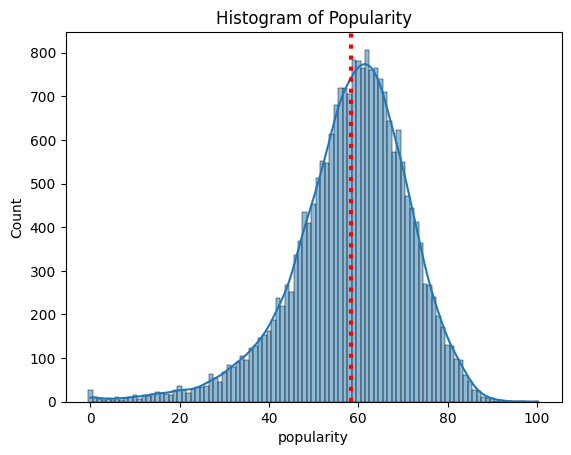

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of the 'popularity' column
mean_popularity = df['popularity'].mean()

# Create the histogram
sns.histplot(df['popularity'], discrete=True, kde=True)
plt.title('Histogram of Popularity')

# Add the vertical line
plt.axvline(x=mean_popularity, color='red', linestyle='dotted', linewidth = 3)

# Show the plot
plt.show()

Popularity appears to be normally distributed, centered at around 60.

**Popularity seems to be slightly left-skewed**

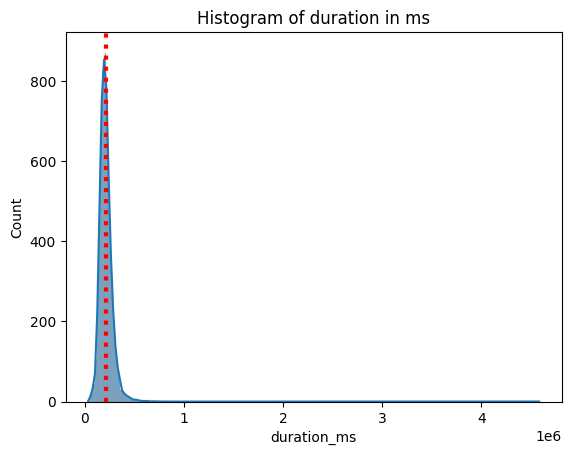

In [16]:
# Calculate the mean of the song duration column
mean_duration = df['duration_ms'].mean()

# Create the histogram
sns.histplot(df['duration_ms'], kde=True)
plt.title('Histogram of duration in ms')

# Add the vertical line
plt.axvline(x=mean_duration, color='red', linestyle='dotted', linewidth = 3)

# Show the plot
plt.show()

Song duration seems to be normally distributed with a mean around 0.2.

**Song duration seems to be extremely right skewed.**

In [17]:
music_metrics_df = df[['danceability', 'energy', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']]

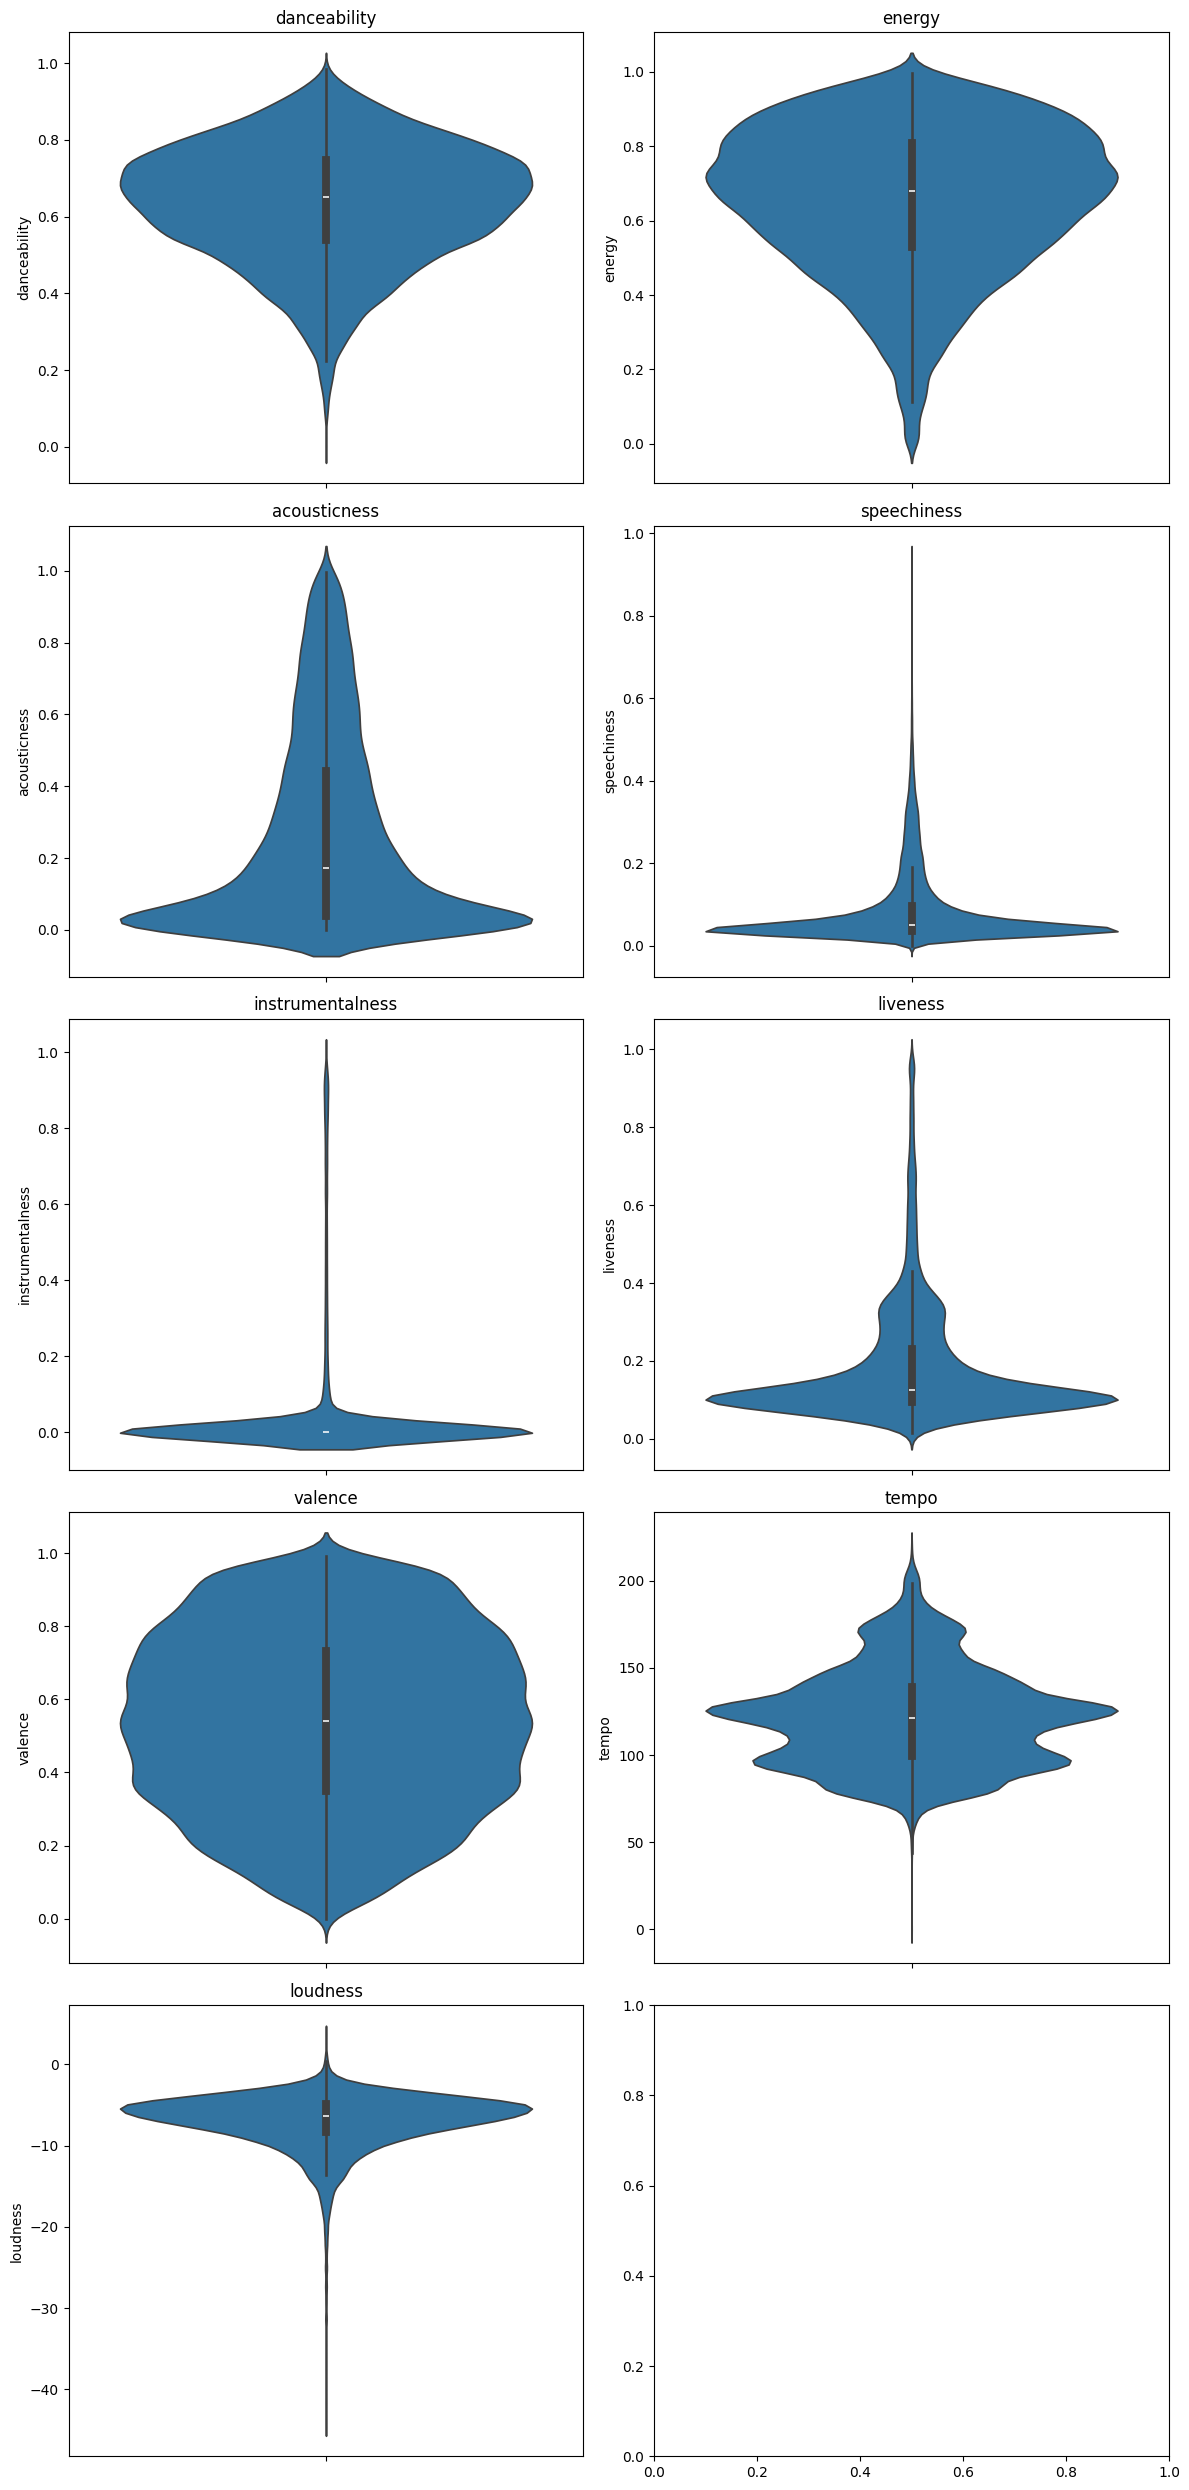

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(12, 25))

for i, col in enumerate(music_metrics_df.columns):
    row = i // 2  # Calculate row index
    col_num = i % 2  # Calculate column index
    sns.violinplot(y=music_metrics_df[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(col)  # Set subplot title

plt.tight_layout()  # Adjust layout for spacing
plt.show()


From the violin plots, it is clear that **many of the song metric features are** **either non-normally distributed or extremely skewed** .

Additionally, it seems that certain song metric features such as **valence, energy, danceability and acousticness capture a greater variability of values in the dataset**. Therefore **these features could be important when explaining the variability** **of the data**.

Furthermore, from the violin and kde plots, it is clear that many of the features are either non-normally distributed or skewed.

This would impact the types of models we can use on our data. Specifically, models that assume normally distributed, [ideally] non-skewed variables such as **linear models** (i.e. Linear Regression) **can not be used to model the dataset**.

Additionally, **highly skewed variables can impact distance calculations**, therefore **ML models that use distance metrics such as K-NNs, would be negatively impacted by skewed data**.

In [19]:
# Create a new column 'decade'
df['decade'] = (df['release_date'] // 10) * 10

# Select only numeric columns before calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Group by 'decade' and calculate the mean of numeric columns only
grouped_df = numeric_df.groupby('decade').mean()

# Display the grouped DataFrame with means
print(grouped_df)

        popularity  danceability    energy       key   loudness      mode  \
decade                                                                      
1940     56.000000      0.596000  0.325000  2.000000 -11.549000  1.000000   
1950     61.032258      0.520258  0.385484  4.032258 -11.840161  0.774194   
1960     58.162069      0.514892  0.493280  5.124138 -11.468190  0.779310   
1970     58.725437      0.556964  0.569925  5.157470 -10.431836  0.744280   
1980     57.002868      0.591493  0.640233  5.195985  -9.796992  0.693117   
1990     58.869314      0.599100  0.647113  5.311913  -8.516841  0.699639   
2000     59.079489      0.614316  0.696700  5.310956  -6.553923  0.629325   
2010     59.076279      0.632391  0.648946  5.343651  -6.693576  0.611497   
2020     57.825529      0.662891  0.664417  5.347211  -6.446993  0.547231   

        speechiness  acousticness  instrumentalness  liveness   valence  \
decade                                                                    
19

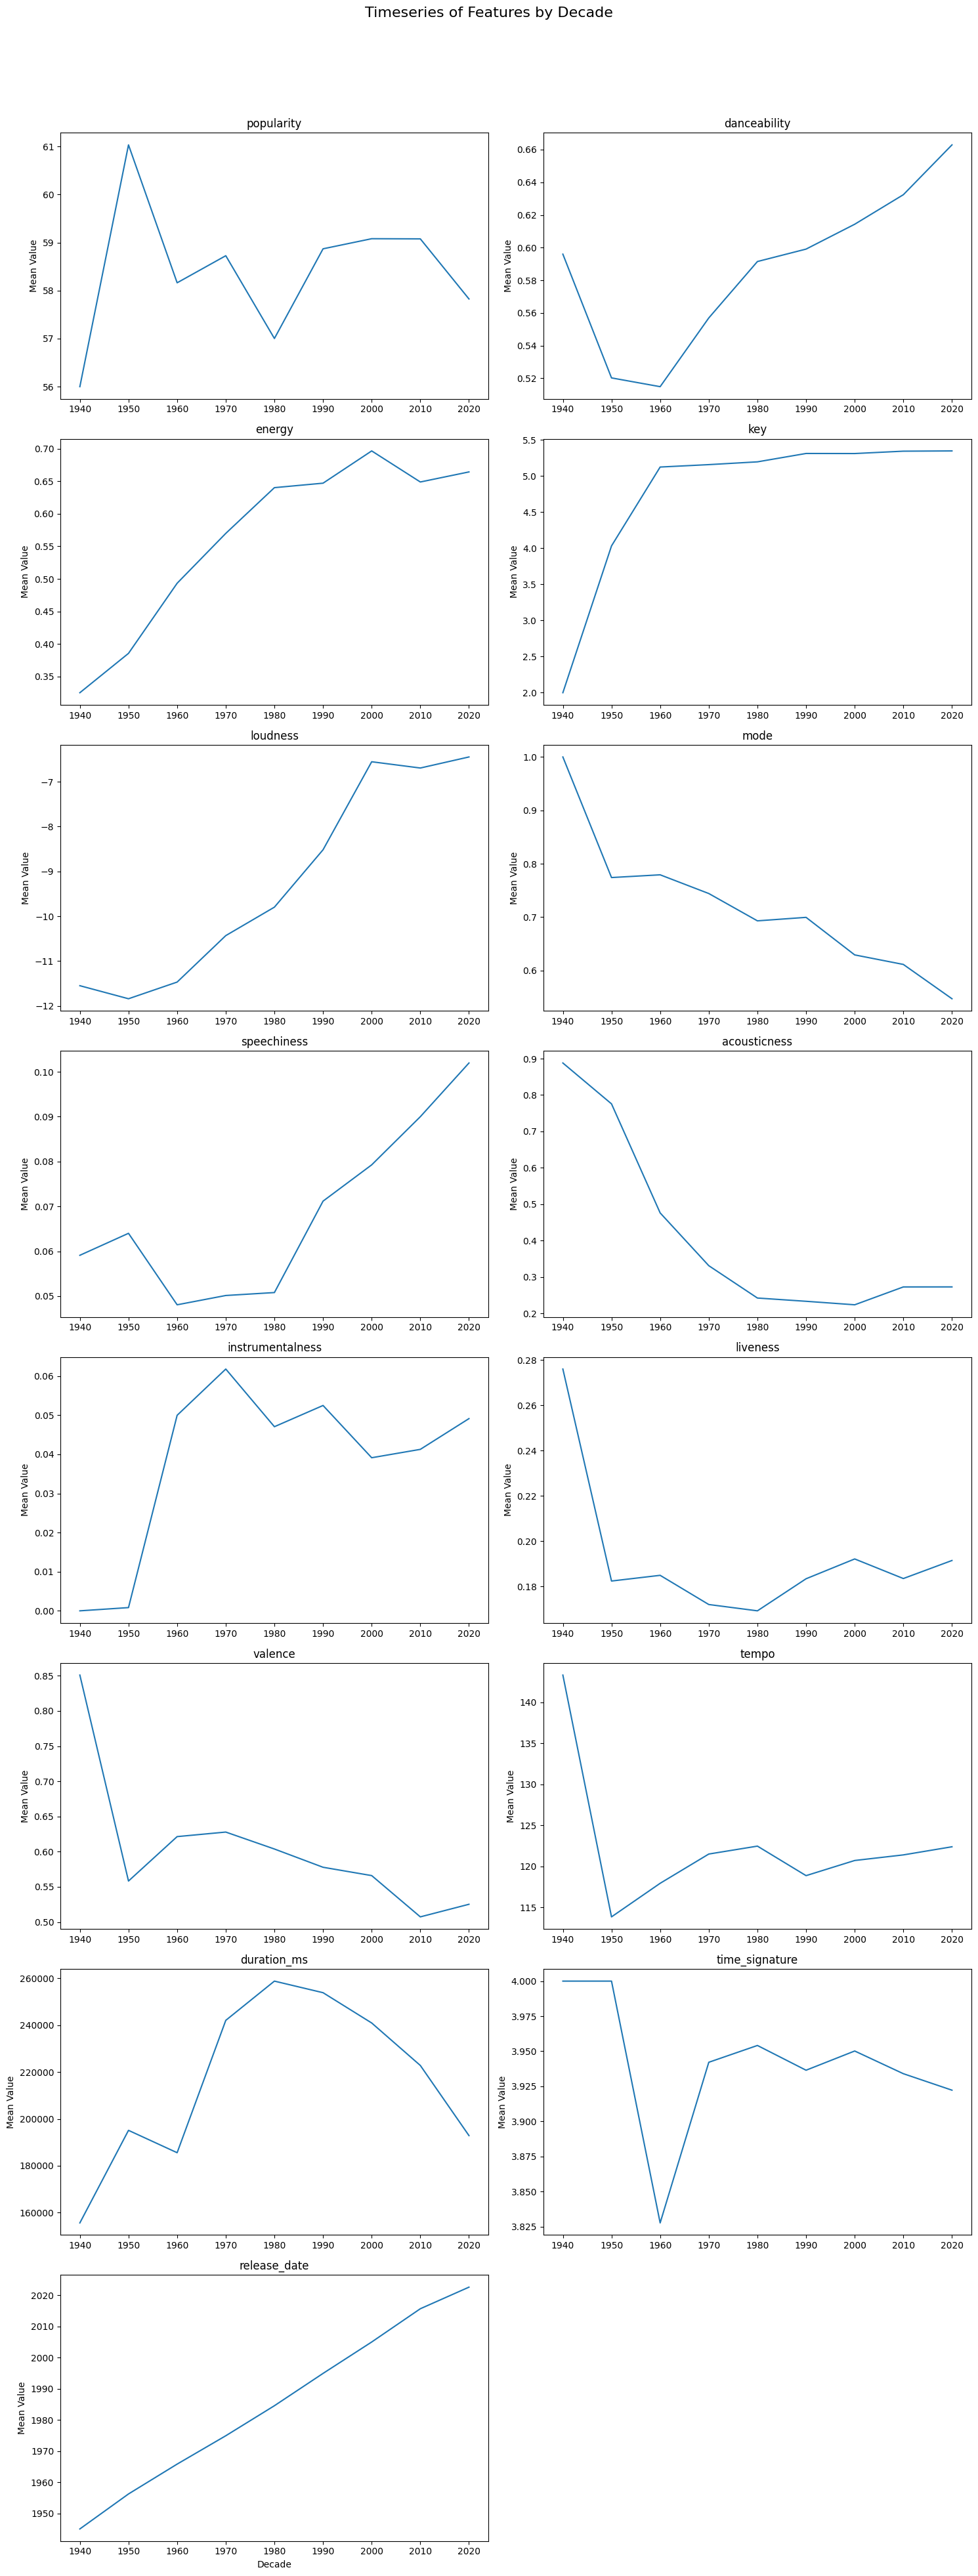

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Create a new column 'decade'
df['decade'] = (df['release_date'] // 10) * 10

# Select only numeric columns for analysis
numeric_df = df.select_dtypes(include=['number'])

# Group by 'decade' and calculate the mean of numeric columns
grouped_df = numeric_df.groupby('decade').mean()

# Get the list of numeric features
features = grouped_df.columns

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 2  # 2 plots per row
num_rows = math.ceil(num_features / num_cols)

# Create subplots with 2 plots per row
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), sharex=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through features and plot their timeseries
for i, feature in enumerate(features):
    axes[i].plot(grouped_df.index, grouped_df[feature])
    axes[i].set_title(feature)
    axes[i].set_ylabel('Mean Value')

# Hide any extra subplots if the number of features is odd
if num_features % num_cols != 0:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

# Set overall plot title and x-axis label
fig.suptitle('Timeseries of Features by Decade', fontsize=16)
plt.xlabel('Decade')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the time series plots above, it seems that **track release date can capture a significant amount of variability in our data**. Thus **it may be an important feature to include in our model**.

#### Multicolinearity

We expect that some of the predictors may be correlated. This is not good for the model as it introduces multicolinearity in the training dataset. One way to deal with this is to conduct feature selection which can help with understanding which features are important to keep.

Through domain knowledge and our understanding of what each feature means, we expect that loudness and energy could be correlated. We would also expect that danceability, valence and energy may have a correlation.

On the other hand we would expect that acousticness and energy or loudness would have a negative correlation.

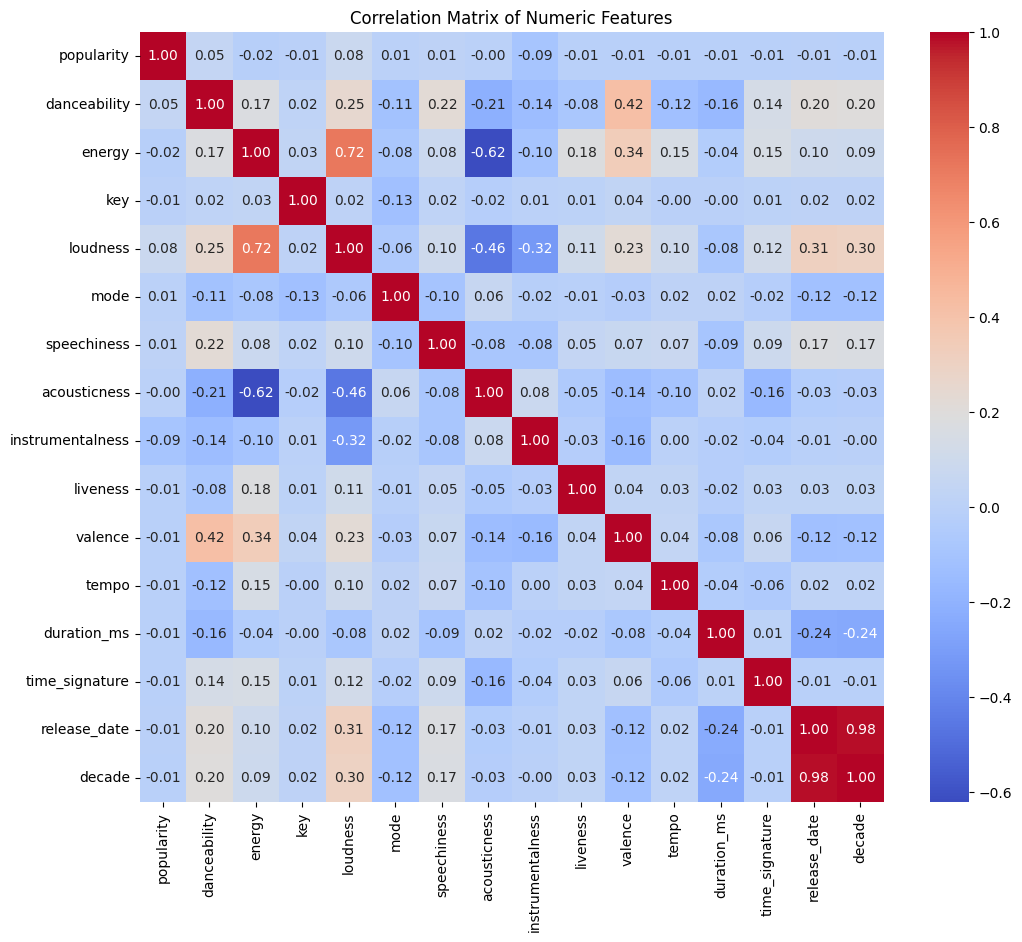

In [21]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()  # Calculate the correlation matrix

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

From the correlation heatmap, it seems that loudness and energy are highly postively correlated and acousticness and energy are highly negatively correlated.

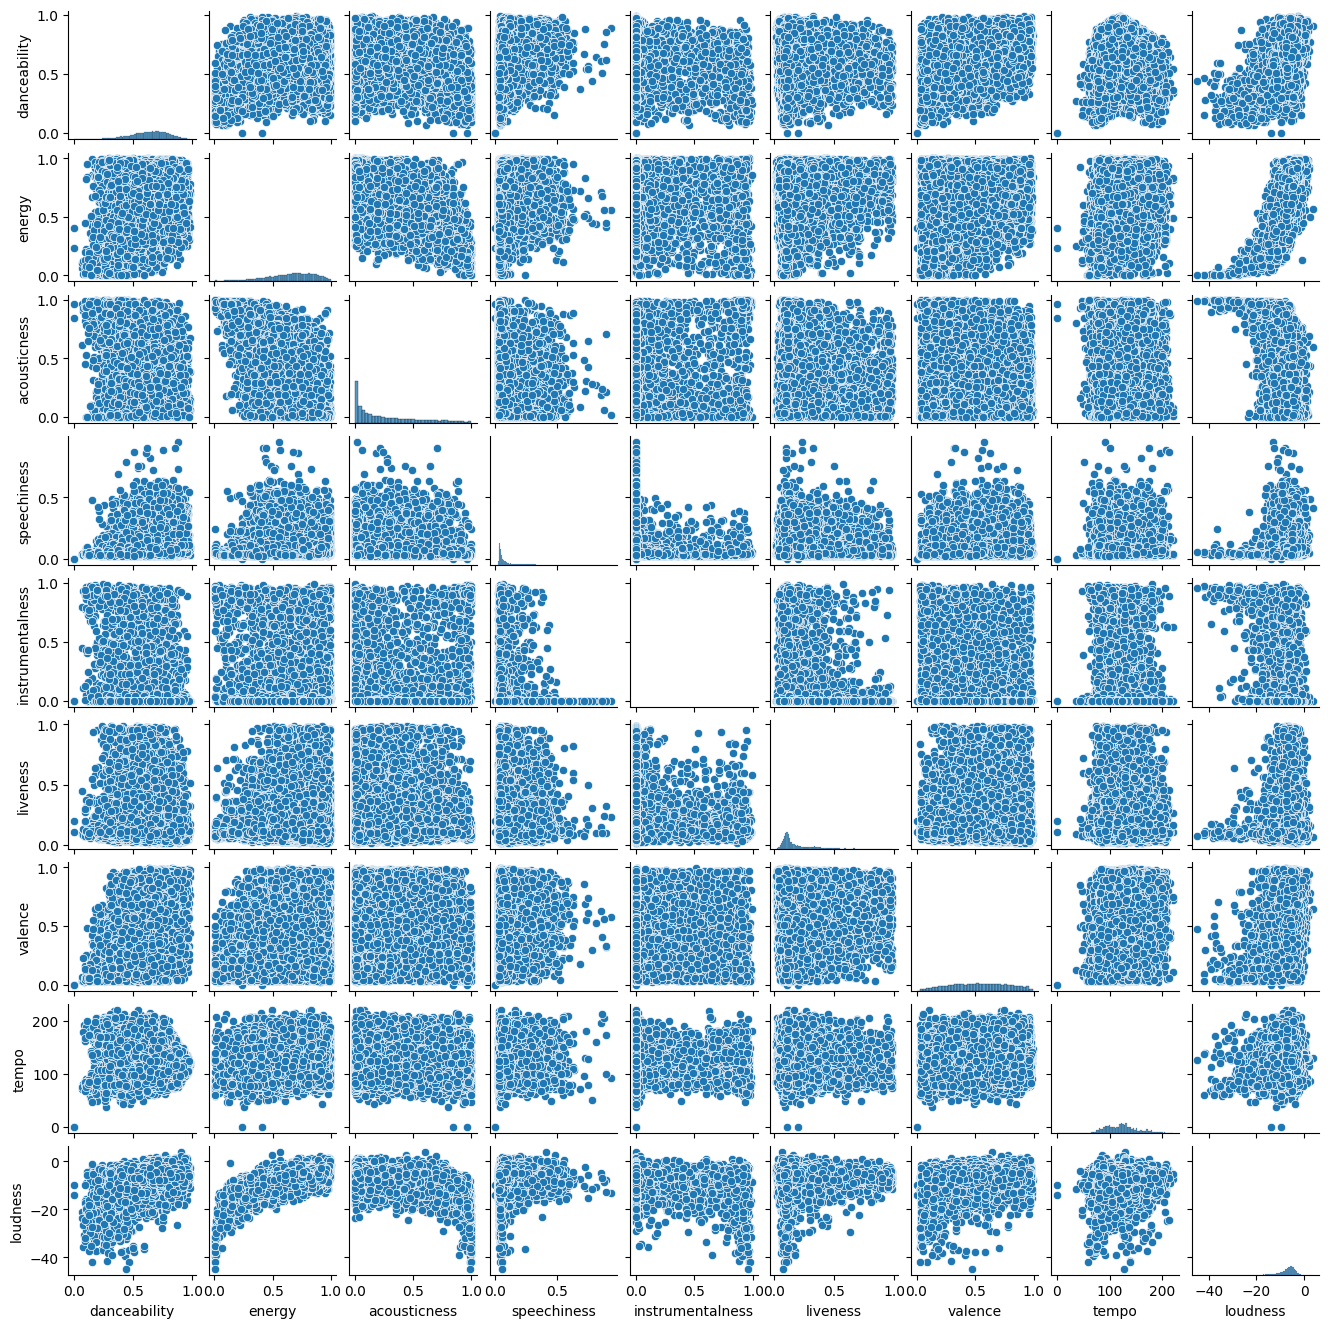

In [22]:
sns.pairplot(music_metrics_df, height=1.5)

From the pairplot, there seems to be identifiable trends between loudness and other variables such as energy and acousticness. There is also a trend between acousticness and energy.

From this, the heatmap and our previously established domain knowledge, **it seems that the variables: acousticness, energy and loudness are correlated with one another**; and may introduce multicolinearity. **Therefore feature selection should be performed on these variables to remove such a possibility**.

#### Data Transformation

- Standardizing/normalizing data

In [23]:
df.drop(['release_date'], axis = 1, inplace = True)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.select_dtypes(include=[np.number])

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data, keeping the original column names
df_transformed = pd.DataFrame(X_scaled, columns=X.columns)

# Show the transformed DataFrame
df_transformed

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,decade
0,2.585174,0.868312,0.336235,1.590276,0.429502,-1.227755,-0.422918,-0.776569,-0.277259,-0.491799,0.139766,-0.058157,0.573111,0.200898,0.781929
1,2.431351,-2.421427,-0.078151,0.750118,0.224346,0.814495,-0.494386,-0.847012,-0.277260,-0.232784,-1.440773,-1.305936,0.413941,0.200898,0.781929
2,2.277527,-0.799358,0.376662,-1.210251,0.302673,0.814495,-0.322864,-0.986680,-0.276703,-0.629724,-0.841832,1.753530,-0.214086,0.200898,0.781929
3,2.200616,0.282022,-0.345986,0.470065,0.003022,0.814495,2.054246,-0.471933,-0.277236,-0.323439,-0.209616,2.286157,0.213738,0.200898,0.097001
4,1.969881,-0.323811,-0.659303,-1.210251,-0.038232,-1.227755,-0.304173,-0.582575,-0.277274,-0.342865,-0.118111,0.426683,0.632939,0.200898,0.097001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,-2.567903,0.568653,-0.244917,0.470065,-0.167848,0.814495,-0.417421,-0.309657,-0.277246,1.152944,-0.737849,0.119185,-0.892235,0.200898,0.781929
22076,-2.798638,-2.167368,0.048186,0.470065,0.599258,0.814495,-0.640619,-0.930731,-0.277274,0.000329,-1.899961,-0.271357,-0.142555,0.200898,0.097001
22077,-2.952461,-0.818901,-1.407219,-1.210251,-1.344431,-1.227755,-0.681300,-0.519878,-0.258277,1.146468,-1.207852,-0.841547,0.187010,0.200898,0.097001
22078,-3.029373,0.366708,0.538374,-0.090041,0.701278,-1.227755,-0.112861,-0.501437,-0.277254,-0.556552,-0.113952,0.081480,-0.432352,0.200898,0.781929


In [25]:
# exporting scaler for later use
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/Analytics Project/Final Model/scaler.pkl')

['/content/drive/MyDrive/Analytics Project/Final Model/scaler.pkl']

In [26]:
# export pd to a csv file
df_transformed.to_csv('song_data_transformed.csv', index=False)

In [27]:
# exporting non transformed pd to csv file as well
df.to_csv('song_data_cleaned.csv', index=False)